## Import Libraries

### The necessary libraries for data manipulation, visualization, and calculation are imported.

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv('wdbc.data', header=None, names=columns)

# Show the first 5 rows
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

## Inspecting the data

### data.taile() Shows the last few rows to see how the data ends

In [32]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

### Shape of the Dataset: Provides the number of rows and columns, giving an idea of the dataset size

In [33]:
data.shape

(569, 32)

### Information of the Dataset: Shows details about the data types and the presence of null values

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

### Statistical Summary: Gives statistical insights such as mean, standard deviation, min, and max for numerical columns.

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Outlier Detection: Using IQR (Interquartile Range)

#### Imports: The code brings in tools for making graphs (matplotlib and seaborn).

### Outlier Function:
#### The calculate_outliers function checks each column in a table (DataFrame) for outliers.
#### It finds the low and high limits for normal values using the first and third quartiles (Q1 and Q3).
#### It counts how many values are outside these limits.

### Prepare Data:
#### The code removes the 'Diagnosis' column from the dataset, focusing only on the features for outlier analysis.

### Count Outliers:
#### It uses the function to count how many outliers are in each feature.

### Make a Bar Graph:
#### The code creates a bar graph showing the number of outliers for each feature, making it easy to see which features have more outliers.

Percentage of Outliers per Feature:
Feature_14    11.423550
Feature_11     6.678383
Feature_13     6.678383
Feature_24     6.151142
Feature_15     5.272408
Feature_16     4.920914
Feature_20     4.920914
Feature_19     4.745167
Feature_4      4.393673
Feature_30     4.217926
Feature_29     4.042179
Feature_17     3.866432
Feature_12     3.514938
Feature_18     3.339192
Feature_7      3.163445
Feature_21     2.987698
Feature_26     2.811951
Feature_6      2.811951
Feature_23     2.636204
Feature_10     2.636204
Feature_9      2.636204
Feature_1      2.460457
Feature_3      2.284710
Feature_27     2.108963
Feature_8      1.757469
Feature_2      1.230228
Feature_25     1.230228
Feature_5      1.054482
Feature_22     0.878735
Feature_28     0.000000
dtype: float64


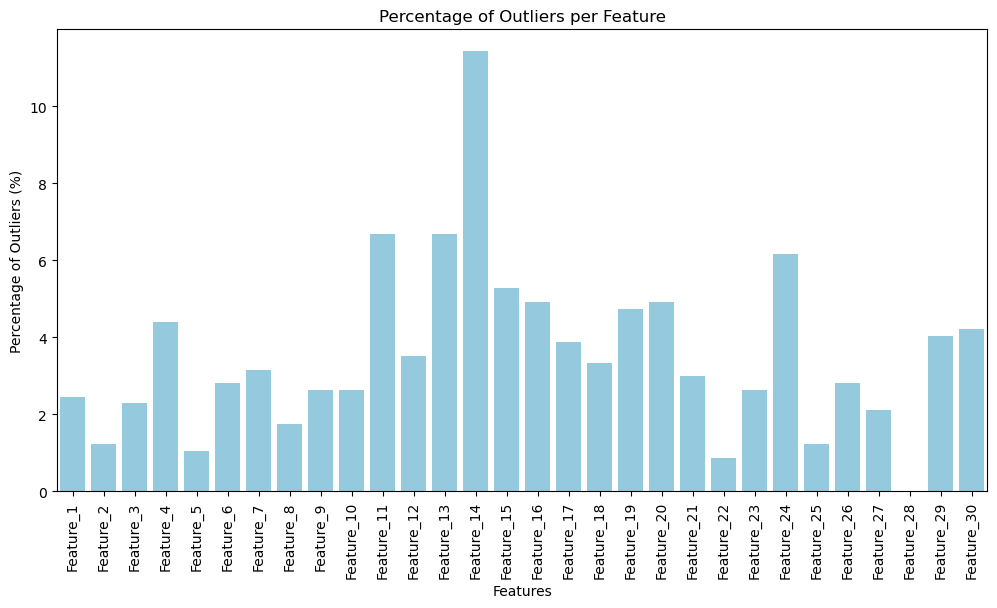

In [36]:
def calculate_outliers_percentage(df):
    outliers_percentage = {}
    total_rows = len(df)
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outliers_percentage[column] = (outliers_count / total_rows) * 100
    return pd.Series(outliers_percentage)
features = data.iloc[:, 2:] 
target = data['Diagnosis']  
# Calculate outlier percentages
outliers_percentage = calculate_outliers_percentage(features)

# Print the outlier percentages
print("Percentage of Outliers per Feature:")
print(outliers_percentage.sort_values(ascending=False))

# Plot the outlier percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_percentage.index, y=outliers_percentage.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Percentage of Outliers per Feature")
plt.xlabel("Features")
plt.ylabel("Percentage of Outliers (%)")
plt.show()


## Check for Misssing Values

#### Missing Values: Identifies any missing values across the dataset
#### value 0 means there are no missing values

In [37]:
if data.isnull().sum().sum() > 0:
    print("Dataset has missing values. Please address them.")
else:
    print("No missing values found.")

No missing values found.


## Checki for Duplicates
#### Duplicate Check: Detects and counts duplicate rows and calculates their percentage

In [38]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


## Checking for unique values
#### Unique Values: Displays the number of unique values in each column, useful for identifying categorical data.


In [39]:
print("\nUnique Values in Each Column:")
print(data.nunique())


Unique Values in Each Column:
ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


## Dropin 'ID' Cloumn since we dont need that for scaling

In [40]:
data.drop('ID', axis=1, inplace=True)

## Scalling features

#### Initialize the Scaler:scaler = StandardScaler() creates an object that will help standardize (scale) the data.

#### Prepare Feature Data:X = data.drop('Diagnosis', axis=1) removes the 'Diagnosis' column from the dataset, so X now contains only the feature columns.

#### Scale the Features:X_scaled = scaler.fit_transform(X) standardizes the features in X. This means it adjusts the values so that they have a mean of 0 and a standard deviation of 1, making the data easier to work with for modeling

#### Prepare Target Data:y = data['Diagnosis'] stores the 'Diagnosis' column in y, which represents the target variable we want to predict

In [41]:
scaler = StandardScaler()
X = data.drop('Diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)
y = data['Diagnosis']

## Splitting Data

#### Split the Data:train_test_split divides the scaled feature data (X_scaled) and the target data (y) into training (70%) and testing (30%) sets.

#### Random State:random_state=42 ensures the split is the same each time the code runs.

#### Print Shapes:The shapes of the training and testing sets are printed to show how many samples and features each contains.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (398, 30)
Testing data shape: (171, 30)


# Visualize the count of Benign vs Malignant cases

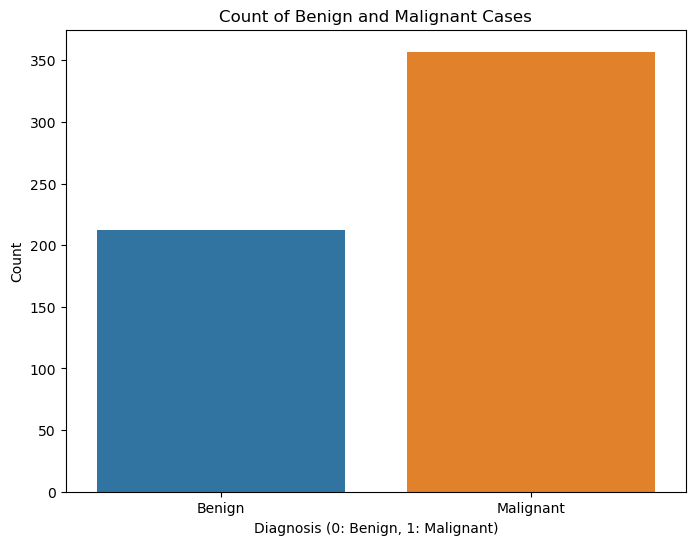

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant Cases')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Set x-tick labels
plt.show()

# Balancing Data with SMOTE
#### Import SMOTE: from imblearn.over_sampling import SMOTE brings in the SMOTE function, which helps to balance the data.

#### Initialize SMOTE: smote = SMOTE(random_state=42) sets up SMOTE with a fixed random state for consistency.

#### Resample Data: X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) applies SMOTE to X_train and y_train, creating a balanced version (X_train_resampled and y_train_resampled) by generating synthetic samples for the minority class.

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution before SMOTE

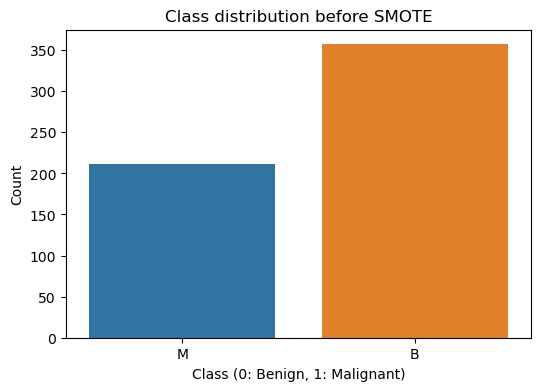

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class distribution before SMOTE")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

# Visualize class distribution after SMOTE

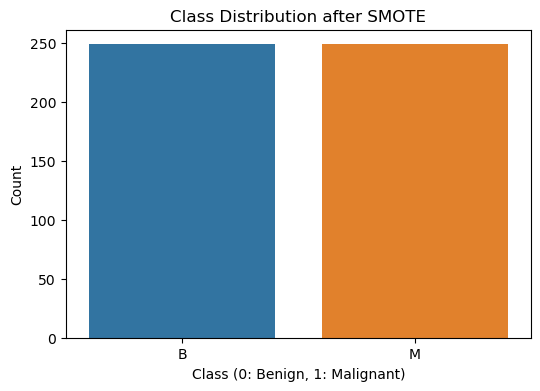

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

# Define Weak Learner for AdaBoost
#### Import Libraries: Import AdaBoostClassifier and DecisionTreeClassifier.

#### Set Weak Learner: Use a simple decision tree (depth = 1) as the base model for AdaBoost.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)


# Implementing AdaBoost with a weak learner

In [64]:
ada_boost = AdaBoostClassifier(
    estimator=base_classifier,      
    n_estimators=50,                
    algorithm='SAMME',              
    random_state=42
)
ada_boost.fit(X_train_resampled, y_train_resampled)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

# Model Prediction and Evaluation
#### Make Predictions : y_pred = ada_boost.predict(X_test) predicts labels for the test set.

#### Import Metrics : Import functions to calculate evaluation metrics.

#### Calculate Metrics : Calculate accuracy, precision, recall, F1 score, and confusion matrix.

#### Display Results : Print the evaluation metrics (accuracy, precision, recall, F1 score).

In [65]:
y_pred = ada_boost.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}") 
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance Metrics:
Accuracy: 0.97
Precision: 0.94
Recall: 0.98
F1 Score: 0.96


# Milestone 3

# Grid Search to find the best combination of hyperparameters

#### This code searches for the best settings for an AdaBoost model.

#### Parameters to Test: It tries different values for:
      Number of trees (n_estimators)
      Step size (learning_rate)
      Boosting type (algorithm)
     
#### Grid Search: It uses GridSearchCV to test all combinations of these settings.

#### Best Settings: It finds and prints the best settings for highest accuracy.

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

base_classifier = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(estimator=base_classifier, random_state=42)
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}


# Re-evaluating the Tuned Model

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate performance metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label='M')
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label='M')
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label='M')
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Tuned Model Performance Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print("\nConfusion Matrix for Tuned Model:")
print(conf_matrix_tuned)



Tuned Model Performance Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Confusion Matrix for Tuned Model:
[[107   1]
 [  1  62]]


In [68]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_tuned, target_names=['Benign', 'Malignant'])
print("Classification Report for Tuned Model:")
print(report)


Classification Report for Tuned Model:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       108
   Malignant       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## Visualizing the metrics before and after tunning the model

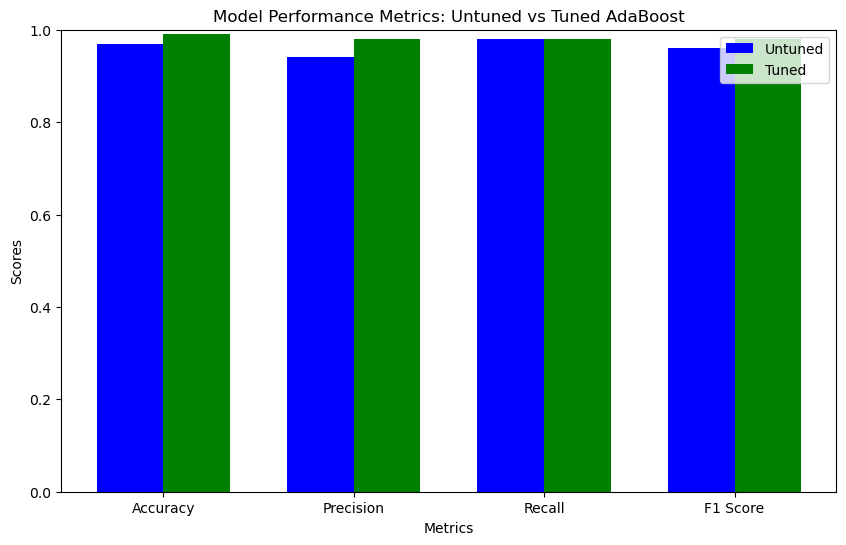

In [69]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
untuned_metrics = [0.97, 0.94, 0.98, 0.96] 
tuned_metrics = [0.99, 0.98, 0.98, 0.98]

x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, untuned_metrics, width, label='Untuned', color='blue')
rects2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned', color='green')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics: Untuned vs Tuned AdaBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.ylim(0, 1)
plt.show()


# Milestone 4

## Visualization and Interpretation of Results Learning

# Confusion Matrix

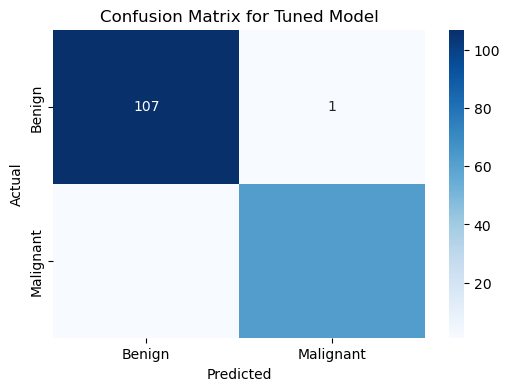

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_tuned, title="Confusion Matrix for Tuned Model")


# ROC curve and AUC

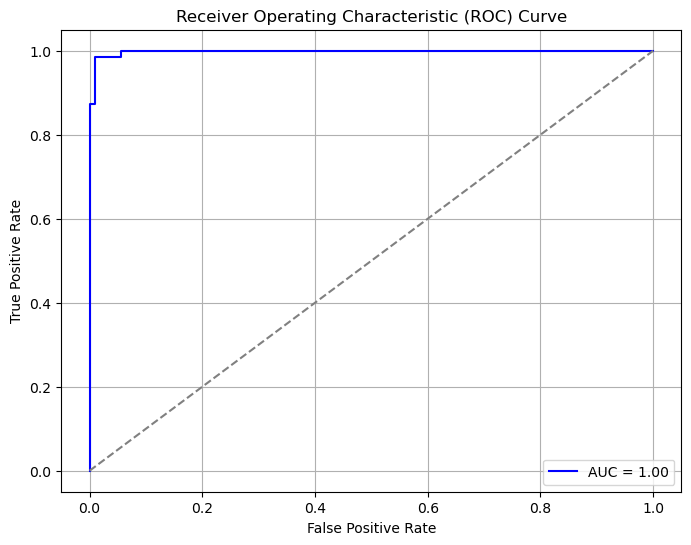

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for ROC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='M')
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Feature Importances

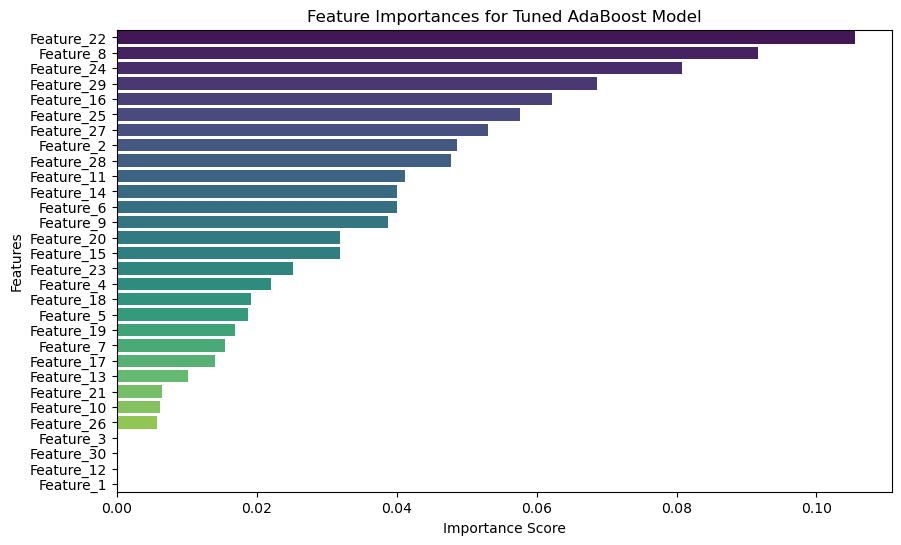

In [72]:
# Extract Feature Importances
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title("Feature Importances for Tuned AdaBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Saving Model

In [73]:
import pickle
with open('ada_boost.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
